In [8]:
import os
import openpyxl

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from glob import glob
from math import ceil, floor
from pathlib import Path


from utility import mean_absolute_percentage_error, simple_regplot, plot_linear_fit, plot_best_ransac_fit, evaluation

In [14]:
excel_filename = 'tree_trait_1.xlsx'
exp_id =  'multiplier_by_3_cpc_sphere_radius_002'
data_folder = Path(r'D:\Code\Apple_Crop_Potential_Prediction\data\characterization')
save_folder = data_folder / exp_id
characterization_filepath = data_folder / exp_id / excel_filename
save_folder.mkdir(exist_ok=True)
print(characterization_filepath)

D:\Code\Apple_Crop_Potential_Prediction\data\characterization\multiplier_by_3_cpc_sphere_radius_002\tree_trait_1.xlsx


In [4]:
measurement_df = pd.read_excel(characterization_filepath, sheet_name='Tree_Level_Traits_1')
measurement_df

,Filename,Tree Height,Trunk Length,Trunk Radius,Branch Recall,Manual Tree Height inch,Manual Tree Height,Diameter1/mm,Diameter2/mm,Diameter
0,tree1,3.185,0.442,0.029,45.0,141,358.14,62,58,60.0
1,tree2,2.892,0.380,0.026,34.0,137,347.98,59,51,55.0
2,tree3,2.616,0.431,0.024,33.0,127,322.58,49,49,49.0
3,tree4,3.189,0.353,0.028,39.0,149,378.46,63,56,59.5
4,tree5,2.796,0.390,0.021,29.0,133,337.82,43,49,46.0
5,tree6,2.828,0.645,0.026,31.0,134,340.36,55,55,55.0
6,tree7,3.252,0.413,0.026,24.0,152,386.08,56,54,55.0
7,tree8,2.867,0.536,0.029,34.0,136,345.44,61,60,60.5
8,tree9,3.184,0.388,0.031,33.0,149,378.46,61,60,60.5


In [6]:
measurement_df['Tree Height Comp'] = measurement_df['Tree Height'] * 1e2 + 50
measurement_df['Trunk Diameter'] = measurement_df['Trunk Radius'] * 1e3 * 2
measurement_df

,Filename,Tree Height,Trunk Length,Trunk Radius,Branch Recall,Manual Tree Height inch,Manual Tree Height,Diameter1/mm,Diameter2/mm,Diameter,Tree Height Comp,Trunk Diameter
0,tree1,3.185,0.442,0.029,45.0,141,358.14,62,58,60.0,368.5,58.0
1,tree2,2.892,0.380,0.026,34.0,137,347.98,59,51,55.0,339.2,52.0
2,tree3,2.616,0.431,0.024,33.0,127,322.58,49,49,49.0,311.6,48.0
3,tree4,3.189,0.353,0.028,39.0,149,378.46,63,56,59.5,368.9,56.0
4,tree5,2.796,0.390,0.021,29.0,133,337.82,43,49,46.0,329.6,42.0
5,tree6,2.828,0.645,0.026,31.0,134,340.36,55,55,55.0,332.8,52.0
6,tree7,3.252,0.413,0.026,24.0,152,386.08,56,54,55.0,375.2,52.0
7,tree8,2.867,0.536,0.029,34.0,136,345.44,61,60,60.5,336.7,58.0
8,tree9,3.184,0.388,0.031,33.0,149,378.46,61,60,60.5,368.4,62.0


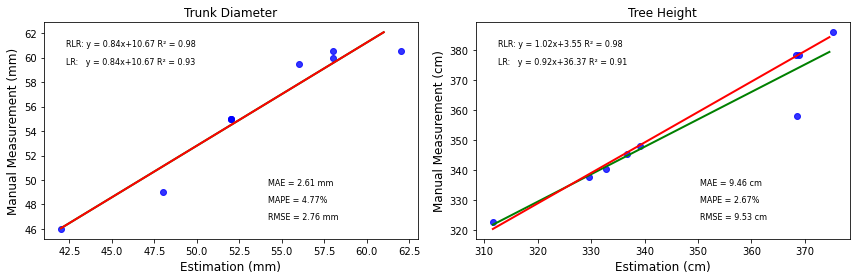

In [15]:
text_in_title_para = {'fontfamily': 'sans-serif', 'fontsize': 12, 'fontweight': 20}
text_in_figure_para = {'fontfamily': 'sans-serif', 'fontsize': 8, 'fontweight': 20, 'horizontalalignment': 'left', 'verticalalignment': 'center'}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax = axes[0]
x_axis = 'Trunk Diameter' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Diameter'  # 'Vertical_Croth_Angle-Degree'

metrics = evaluation(measurement_df, x=x_axis, y=y_axis)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=measurement_df, ci=None, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="RANSAC regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0][0]:.2f}x+{rlr_intercept[0]:.2f} R\u00b2 = 0.98', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x+{lr_intercept[0]:.2f} R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.26, f"MAE = {metrics['MAE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.1, f"RMSE = {metrics['RMSE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Trunk Diameter', **text_in_title_para)
ax.set_xlabel('Estimation (mm)', **text_in_title_para)
ax.set_ylabel('Manual Measurement (mm)', **text_in_title_para)

ax = axes[1]
x_axis = 'Tree Height Comp' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Manual Tree Height'  # 'Vertical_Croth_Angle-Degree'

metrics = evaluation(measurement_df, x=x_axis, y=y_axis)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=measurement_df, ci=None, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="RANSAC regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0][0]:.2f}x+{rlr_intercept[0]:.2f} R\u00b2 = 0.98', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x+{lr_intercept[0]:.2f} R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.26, f"MAE = {metrics['MAE']} cm", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.1, f"RMSE = {metrics['RMSE']} cm", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Tree Height', **text_in_title_para)
ax.set_xlabel('Estimation (cm)', **text_in_title_para)
ax.set_ylabel('Manual Measurement (cm)', **text_in_title_para)

fig.tight_layout()

plt.savefig(str(save_folder / 'tree_trait_evaluation.png'), dpi=300)